In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [12]:
games = ["LoL", "Dota 2", "CS:GO", "DayZ", "HOS", "Isaac", "Shows", "Hearth", "WoT", "Agar.io"]

viewers =  [1070, 472, 302, 239, 210, 171, 170, 90, 86, 71]

# Pie Chart: League of Legends Viewers' Whereabouts

labels = ["US", "DE", "CA", "N/A", "GB", "TR", "BR", "DK", "PL", "BE", "NL", "Others"]

countries = [447, 66, 64, 49, 45, 28, 25, 20, 19, 17, 17, 279]

In [13]:
stream = pd.read_csv('stream.csv')

In [14]:
stream.game = stream.game.fillna('other')


In [15]:
stream.country = stream.country.fillna('other')
stream.subscriber = stream.subscriber.fillna('None')
stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526299 entries, 0 to 526298
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   time           526299 non-null  object
 1   device_id      526271 non-null  object
 2   login          526299 non-null  object
 3   channel        526299 non-null  object
 4   country        526299 non-null  object
 5   player         526299 non-null  object
 6   game           526299 non-null  object
 7   stream_format  267332 non-null  object
 8   subscriber     526299 non-null  object
dtypes: object(9)
memory usage: 36.1+ MB


In [16]:
stream.stream_format.unique() 
stream.stream_format = stream.stream_format.fillna('other')  
stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526299 entries, 0 to 526298
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   time           526299 non-null  object
 1   device_id      526271 non-null  object
 2   login          526299 non-null  object
 3   channel        526299 non-null  object
 4   country        526299 non-null  object
 5   player         526299 non-null  object
 6   game           526299 non-null  object
 7   stream_format  526299 non-null  object
 8   subscriber     526299 non-null  object
dtypes: object(9)
memory usage: 36.1+ MB


In [17]:
stream.device_id=stream.device_id.fillna('none')
stream.head()

,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,other,None
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,False
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,False
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,False
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,False


In [18]:
 
game_count = stream.groupby('game').game.count()


In [19]:
game = pd.DataFrame({'game': game_count.index, 'game_count': game_count.values})
game['prop'] = game['game_count'] / np.sum(game['game_count'])
game = game.sort_values('prop', ascending=False)

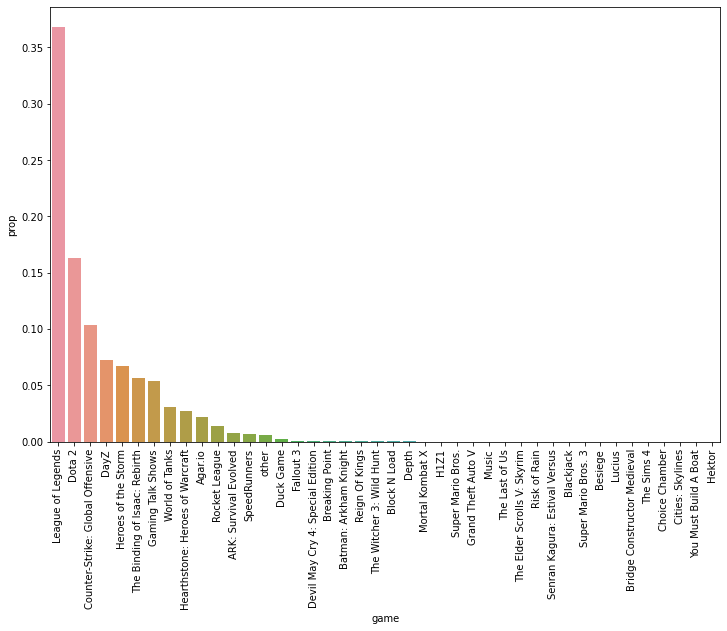

In [20]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'game', y = 'prop', data = game)
plt.xticks(rotation=90)
plt.show()

In [21]:
country_count = stream.groupby('country').country.count()

In [22]:
country = pd.DataFrame({'country': country_count.index, 'country_count': country_count.values})
country = country.sort_values('country_count', ascending=False).reset_index()
del country['index']
country.head(10)

,country,country_count
0,US,190378
1,RU,29807
2,TW,29489
3,DE,29262
4,CA,27350
5,GB,22351
6,other,17164
7,SE,12648
8,PL,10025
9,TR,9313


In [23]:
country_top = country[:5].copy()
new_row = pd.DataFrame(data = {'country':'other', 'country_count': [country['country_count'][5:].sum()]})
country_concat = pd.concat([country_top, new_row]).reset_index()
country_concat

,index,country,country_count
0,0,US,190378
1,1,RU,29807
2,2,TW,29489
3,3,DE,29262
4,4,CA,27350
5,0,other,220013


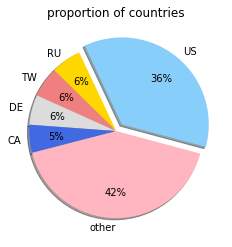

In [24]:
explode = (0.1, 0, 0, 0, 0, 0)
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink']
plt.pie(country_concat.country_count, labels = country_concat.country, autopct='%1.0f%%', explode=explode, colors=colors, shadow=True, startangle=345, pctdistance=0.7)
plt.title('proportion of countries')
plt.show()

In [25]:
america = stream[stream['country'] == 'US']

In [26]:
america.head(10)

,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,other,None
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,False
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,False
5,2015-01-01 23:27:36,343fe2bfd58595d5c18602d420ecf6f9d694d5a8,7814f661a54349ff5eee84f9d6f476918c9b7270,george,US,iphone_t,DayZ,other,None
6,2015-01-01 21:09:23,80a0c7d1abb6a5a0060e18202b77bef831e08ca5,eb158cab3f606d3894a32e20bddbfd2d589095a9,frank,US,site,League of Legends,high,True
9,2015-01-01 22:00:14,593ed161c456eeeb9e18b8005786d42abc1a7373,ef24dc49ceb4bcd3cccb0fa862d8a150ecf935e1,frank,US,site,League of Legends,medium,False
11,2015-01-01 22:59:56,1a247324beabdb85b2b8a97472f28f6cf9026fe1,c485d2914068876ebd6cf3ee6812dc939abae8d7,frank,US,android,League of Legends,other,None
12,2015-01-01 22:10:46,20bde4b4418df3ce2701869233e12b1b4a30da88,7abc32d6617b4a13b78dd2710f22fe8a2305f0fd,george,US,ipad_t,DayZ,other,None
13,2015-01-01 13:46:00,21d94696c9b0f4f9eafc785a2d9d1be1982244b1,c2de0a4d1258e2fc093017d5a793a625af9a0d44,estelle,US,embed,Dota 2,high,False
15,2015-01-01 21:04:20,2e7bcee08428c8ba8c5ce7d44a930dfee7f34db2,4fac13dc5b1cc9d3b18ad0ff62da2adb635375fd,frank,US,site,League of Legends,high,False


In [27]:
games = america.groupby('game').game.count()
games_df = pd.DataFrame(data = {'game': games.index, 'count': games.values})\
    .sort_values('count', ascending = False)\
    .reset_index()
games_df_top = games_df[:9].copy()
del games_df_top['index']
games_df_top

,game,count
0,League of Legends,85606
1,DayZ,28269
2,The Binding of Isaac: Rebirth,17045
3,Dota 2,16747
4,Counter-Strike: Global Offensive,13332
5,Heroes of the Storm,10015
6,Hearthstone: Heroes of Warcraft,5454
7,Rocket League,3501
8,Agar.io,3245


<Figure size 432x288 with 0 Axes>

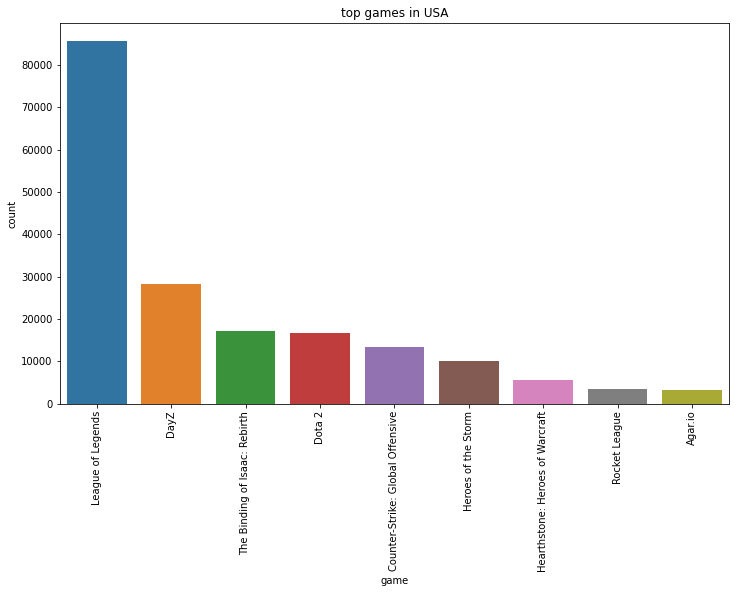

In [28]:
plt.clf()
plt.figure(figsize = (12, 7))
plt.title('top games in USA')
sns.barplot(x = 'game', y = 'count', data=games_df_top)
plt.xticks(rotation=90)
plt.show()

In [29]:
channels = america.groupby('channel').channel.count()
channels_df = pd.DataFrame(data = {'name': channels.index, 'count_channel': channels.values})
channels_df = channels_df.sort_values('count_channel', ascending=False).reset_index()
channels_df

,index,name,count_channel
0,2,frank,85947
1,3,george,31662
2,8,newman,23060
3,6,kramer,16859
4,1,estelle,15673
5,7,morty,10039
6,4,helen,5570
7,5,jerry,1075
8,9,susan,369
9,0,elaine,124


<AxesSubplot:title={'center':'top channels of USA'}, xlabel='name', ylabel='count_channel'>

<Figure size 432x288 with 0 Axes>

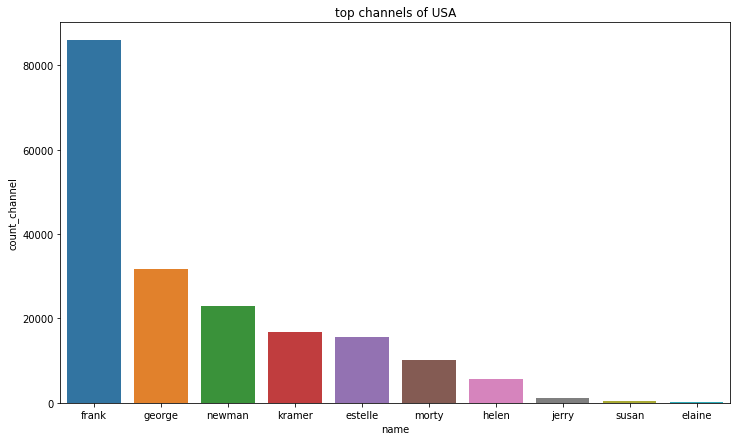

In [30]:
plt.clf()
plt.figure(figsize = (12, 7))
plt.title('top channels of USA')
sns.barplot(x = 'name', y = 'count_channel', data=channels_df)

In [31]:
frank = america[america['channel'] == 'frank']
frank

,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,other,None
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,False
6,2015-01-01 21:09:23,80a0c7d1abb6a5a0060e18202b77bef831e08ca5,eb158cab3f606d3894a32e20bddbfd2d589095a9,frank,US,site,League of Legends,high,True
9,2015-01-01 22:00:14,593ed161c456eeeb9e18b8005786d42abc1a7373,ef24dc49ceb4bcd3cccb0fa862d8a150ecf935e1,frank,US,site,League of Legends,medium,False
11,2015-01-01 22:59:56,1a247324beabdb85b2b8a97472f28f6cf9026fe1,c485d2914068876ebd6cf3ee6812dc939abae8d7,frank,US,android,League of Legends,other,None
...,...,...,...,...,...,...,...,...,...
526269,2015-01-01 03:53:44,4339f80a6c3ba57ada6f2670e6d133d60b026068,522248f016d94ae71d010dd28b75604b7e0a01ac,frank,US,site,League of Legends,high,False
526282,2015-01-01 20:38:30,2889c9b18eff55153247dedaf58199c77c6a2fd2,b62f88d164168e1b1bb41bb60dce31296cd7f431,frank,US,android,League of Legends,other,None
526288,2015-01-01 02:26:56,00d49a012d7d54066ce861bc00c144aeee3d1811,2224c6356a3d74a872e7319a63154ff95bc91b24,frank,US,iphone_t,League of Legends,other,None
526289,2015-01-01 22:30:52,94ebb7d5d3dbda1128ab40ea4c550540410c1ea0,883b1f98fd38e24da1c78511de333f8dd081928b,frank,US,ipad_t,League of Legends,other,None


In [32]:
frank_games = frank.groupby('game').game.count()
frank_game = pd.DataFrame(data={'game': frank_games.index, 'count': frank_games.values})
frank_game['prop'] = frank_game['count'] / np.sum(frank_game['count'])
frank_game

,game,count,prop
0,H1Z1,3,0.000035
1,League of Legends,85606,0.996032
2,other,338,0.003933


In [33]:
russia = stream[stream["country"] == "RU"].reset_index()
del russia["index"]

In [34]:
russia.head()

,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 19:10:58,16679ceba8bf5fb10f253e51f9a286c11b011e02,3b8deb77fb36b6147c27cbdb82a925aaf26b629b,jerry,RU,embed,Dota 2,chunked,False
1,2015-01-01 18:28:52,5e489130a987577cee0eb7dbb36e1f5af43ad35a,c6cc999adc1cbb317d390f1f0a954cf5557d1bb3,jerry,RU,embed,Dota 2,chunked,False
2,2015-01-01 17:52:05,5bc5151065312fc4ebade6323a2274ee9a8e1d84,b78d43099a0c9bfc58e6bc7fa2bc0348ad00b0d4,jerry,RU,frontpage,Dota 2,high,False
3,2015-01-01 00:18:33,813c207eacb500257d1c510165ffa7f33520bc40,2febe26042af9aadda25108760c9207bb5ce5b75,susan,RU,site,World of Tanks,chunked,False
4,2015-01-01 18:08:25,28786963a2ae24481f3dc3f2d5c08b5e71fe90d0,518fb7315cd0bc2c1b232e7f0241dad05a1aaca8,jerry,RU,site,Dota 2,chunked,False


In [35]:
game_russia = russia.groupby("game").game.count()

game_russia


game
ARK: Survival Evolved                  26
Agar.io                               522
Batman: Arkham Knight                   1
Counter-Strike: Global Offensive     4283
DayZ                                  183
Depth                                   2
Dota 2                              11190
Duck Game                              29
Fallout 3                               8
Gaming Talk Shows                      11
Hearthstone: Heroes of Warcraft       467
Heroes of the Storm                  1238
League of Legends                    1058
Rocket League                         139
SpeedRunners                          108
The Binding of Isaac: Rebirth         475
World of Tanks                       9978
other                                  89
Name: game, dtype: int64

In [36]:
games_russia_df = pd.DataFrame(data = {"game": game_russia.index, "game_count":game_russia.values})
games_russia_df = games_russia_df.sort_values('game_count', ascending=False).reset_index()

In [37]:
# del games_russia_df['index']
games_russia_df

,index,game,game_count
0,6,Dota 2,11190
1,16,World of Tanks,9978
2,3,Counter-Strike: Global Offensive,4283
3,11,Heroes of the Storm,1238
4,12,League of Legends,1058
5,1,Agar.io,522
6,15,The Binding of Isaac: Rebirth,475
7,10,Hearthstone: Heroes of Warcraft,467
8,4,DayZ,183
9,13,Rocket League,139


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Dota 2'),
  Text(1, 0, 'World of Tanks'),
  Text(2, 0, 'Counter-Strike: Global Offensive'),
  Text(3, 0, 'Heroes of the Storm'),
  Text(4, 0, 'League of Legends'),
  Text(5, 0, 'Agar.io'),
  Text(6, 0, 'The Binding of Isaac: Rebirth'),
  Text(7, 0, 'Hearthstone: Heroes of Warcraft'),
  Text(8, 0, 'DayZ'),
  Text(9, 0, 'Rocket League'),
  Text(10, 0, 'SpeedRunners'),
  Text(11, 0, 'other'),
  Text(12, 0, 'Duck Game'),
  Text(13, 0, 'ARK: Survival Evolved'),
  Text(14, 0, 'Gaming Talk Shows'),
  Text(15, 0, 'Fallout 3'),
  Text(16, 0, 'Depth'),
  Text(17, 0, 'Batman: Arkham Knight')])

<Figure size 432x288 with 0 Axes>

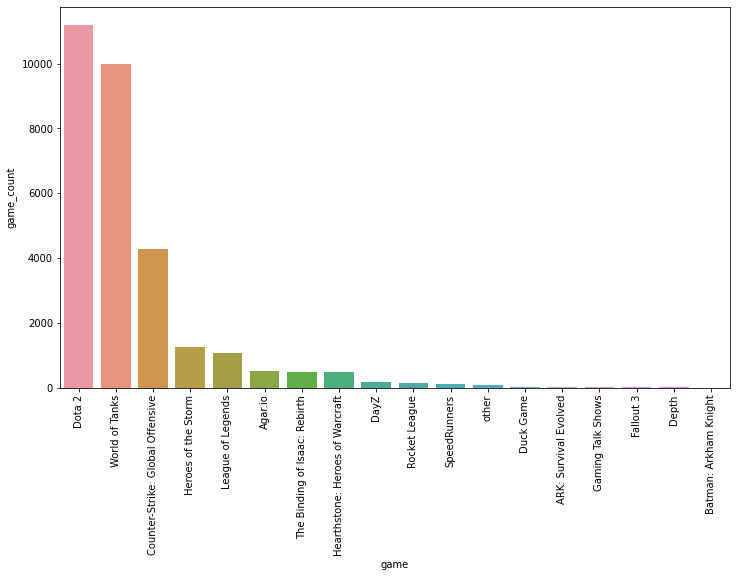

In [38]:
plt.clf()
plt.figure(figsize = (12,7))
sns.barplot(x = 'game', y = 'game_count', data = games_russia_df)
plt.xticks(rotation = 90)

In [39]:
rus_df_for_chi = games_russia_df.sort_values('game').reset_index()
del rus_df_for_chi['index']
del rus_df_for_chi['level_0']
rus_df_for_chi

,game,game_count
0,ARK: Survival Evolved,26
1,Agar.io,522
2,Batman: Arkham Knight,1
3,Counter-Strike: Global Offensive,4283
4,DayZ,183
5,Depth,2
6,Dota 2,11190
7,Duck Game,29
8,Fallout 3,8
9,Gaming Talk Shows,11


In [40]:
am_df_for_chi = games_df.sort_values('game').reset_index()
del am_df_for_chi['index']
del am_df_for_chi['level_0']

In [41]:
am_df_for_chi

,game,count
0,ARK: Survival Evolved,2585
1,Agar.io,3245
2,Batman: Arkham Knight,55
3,Blackjack,1
4,Block N Load,34
5,Breaking Point,131
6,Counter-Strike: Global Offensive,13332
7,DayZ,28269
8,Depth,18
9,Devil May Cry 4: Special Edition,2


In [42]:
chi_df = pd.merge(rus_df_for_chi, am_df_for_chi, how='inner', on = 'game')
chi_df

,game,game_count,count
0,ARK: Survival Evolved,26,2585
1,Agar.io,522,3245
2,Batman: Arkham Knight,1,55
3,Counter-Strike: Global Offensive,4283,13332
4,DayZ,183,28269
5,Depth,2,18
6,Dota 2,11190,16747
7,Duck Game,29,503
8,Fallout 3,8,258
9,Gaming Talk Shows,11,124


In [44]:
chi_df['diff'] = chi_df['count'] - chi_df['game_count']

In [45]:
chi_df

,game,game_count,count,diff
0,ARK: Survival Evolved,26,2585,2559
1,Agar.io,522,3245,2723
2,Batman: Arkham Knight,1,55,54
3,Counter-Strike: Global Offensive,4283,13332,9049
4,DayZ,183,28269,28086
5,Depth,2,18,16
6,Dota 2,11190,16747,5557
7,Duck Game,29,503,474
8,Fallout 3,8,258,250
9,Gaming Talk Shows,11,124,113


In [51]:
table = chi_df.rename(columns = {'count': 'US_games', 'game_count': 'RUS_games'})

In [52]:
table

,game,RUS_games,US_games,diff
0,ARK: Survival Evolved,26,2585,2559
1,Agar.io,522,3245,2723
2,Batman: Arkham Knight,1,55,54
3,Counter-Strike: Global Offensive,4283,13332,9049
4,DayZ,183,28269,28086
5,Depth,2,18,16
6,Dota 2,11190,16747,5557
7,Duck Game,29,503,474
8,Fallout 3,8,258,250
9,Gaming Talk Shows,11,124,113


In [59]:
table['prop_US'] = table['US_games'] / np.sum(table['US_games'])*100
table['prop_RUS'] = table['RUS_games']/ np.sum(table['RUS_games'])*100

In [60]:
table

,game,RUS_games,US_games,diff,prop_US,prop_RUS
0,ARK: Survival Evolved,26,2585,2559,1.359818,0.087228
1,Agar.io,522,3245,2723,1.707005,1.751266
2,Batman: Arkham Knight,1,55,54,0.028932,0.003355
3,Counter-Strike: Global Offensive,4283,13332,9049,7.013188,14.369108
4,DayZ,183,28269,28086,14.870673,0.613950
5,Depth,2,18,16,0.009469,0.006710
6,Dota 2,11190,16747,5557,8.809620,37.541517
7,Duck Game,29,503,474,0.264599,0.097293
8,Fallout 3,8,258,250,0.135719,0.026839
9,Gaming Talk Shows,11,124,113,0.065229,0.036904
